In [2]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils
import os


In [3]:
for dirname, _, filenames in os.walk('C:/Users/devar/mj2/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/devar/mj2/dataset\emnist-balanced-mapping.txt
C:/Users/devar/mj2/dataset\emnist-balanced-test.csv
C:/Users/devar/mj2/dataset\emnist-balanced-train.csv
C:/Users/devar/mj2/dataset\emnist-byclass-mapping.txt
C:/Users/devar/mj2/dataset\emnist-byclass-test.csv
C:/Users/devar/mj2/dataset\emnist-byclass-train.csv
C:/Users/devar/mj2/dataset\emnist-bymerge-mapping.txt
C:/Users/devar/mj2/dataset\emnist-bymerge-test.csv
C:/Users/devar/mj2/dataset\emnist-bymerge-train.csv
C:/Users/devar/mj2/dataset\emnist-digits-mapping.txt
C:/Users/devar/mj2/dataset\emnist-digits-test.csv
C:/Users/devar/mj2/dataset\emnist-digits-train.csv
C:/Users/devar/mj2/dataset\emnist-letters-mapping.txt
C:/Users/devar/mj2/dataset\emnist-letters-test.csv
C:/Users/devar/mj2/dataset\emnist-letters-train.csv
C:/Users/devar/mj2/dataset\emnist-mnist-mapping.txt
C:/Users/devar/mj2/dataset\emnist-mnist-test.csv
C:/Users/devar/mj2/dataset\emnist-mnist-train.csv
C:/Users/devar/mj2/dataset\emnist_source_files\emnist-balanced-t

In [4]:
train_df = pd.read_csv('C:/Users/devar/mj2/dataset/emnist-balanced-train.csv', header=None)
train_df_digit=pd.read_csv('C:/Users/devar/mj2/dataset/emnist-digits-train.csv',header=None)
train_df_letters=pd.read_csv('C:/Users/devar/mj2/dataset/emnist-letters-train.csv')
train_df.head()
train_df_digit.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:

train_df_letters['23'].max()

26

In [6]:
X_train = train_df.loc[:, 1:]
y_train = train_df.loc[:, 0]

In [7]:
label_map = pd.read_csv("C:/Users/devar/mj2/dataset/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
label_map.head()
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

In [8]:
label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [9]:
sample_image = X_train.iloc[42]
sample_label = y_train.iloc[42]
sample_image.shape, sample_label


((784,), 23)

Label entry 42: N


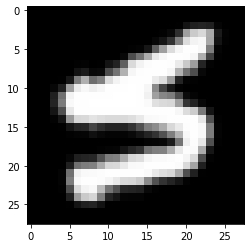

In [10]:
W = 28
H = 28
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(W, H), cmap=plt.cm.gray)
plt.show()
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [11]:
X_train = np.apply_along_axis(reshape_and_rotate, 1, X_train.values)
X_train.shape

(112800, 28, 28)

Label entry 42: N


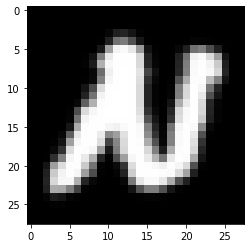

In [12]:
sample_image = X_train[42]
sample_label = y_train.iloc[42]
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(sample_image.reshape(W, H), cmap=plt.cm.gray)
plt.show()

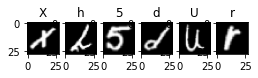

In [13]:
for i in range(100, 106):
    plt.subplot(390 + (i+1))
    plt.imshow(X_train[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_train[i]])

In [14]:
X_train = X_train.astype('float32') / 255
number_of_classes = y_train.nunique()
number_of_classes

47

In [15]:
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_train.shape

(112800, 47)

In [16]:
X_train = X_train.reshape(-1, W, H, 1)
X_train.shape

(112800, 28, 28, 1)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size= 0.20, 
                                                  random_state=20)

In [18]:
model = Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(W, H, 1)))
model.add(BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0

In [19]:
optimizer_name = 'adam'
model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=32)

In [28]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1,  
                                            factor=0.5, 
                                            min_lr=0.001)
callback = [early_stopping, learning_rate_reduction]
history = model.fit_generator(train_gen, steps_per_epoch=len(X_train)/32, epochs=15, \
                             validation_data=(X_val, y_val),callbacks=callback)

Epoch 1/15
2820/2820 [==============================] - 124s 44ms/step - loss: 0.3542 - accuracy: 0.8704 - val_loss: 0.3287 - val_accuracy: 0.8828
Epoch 2/15
2820/2820 [==============================] - 128s 45ms/step - loss: 0.3464 - accuracy: 0.8732 - val_loss: 0.3128 - val_accuracy: 0.8867
Epoch 3/15
2820/2820 [==============================] - 124s 44ms/step - loss: 0.3454 - accuracy: 0.8733 - val_loss: 0.3137 - val_accuracy: 0.8865
Epoch 4/15
2820/2820 [==============================] - 122s 43ms/step - loss: 0.3345 - accuracy: 0.8769 - val_loss: 0.3162 - val_accuracy: 0.8862
Epoch 5/15
2820/2820 [==============================] - 122s 43ms/step - loss: 0.3287 - accuracy: 0.8771 - val_loss: 0.3116 - val_accuracy: 0.8862
Epoch 6/15
2820/2820 [==============================] - 122s 43ms/step - loss: 0.3249 - accuracy: 0.8790 - val_loss: 0.3179 - val_accuracy: 0.8857
Epoch 7/15
2820/2820 [==============================] - 125s 44ms/step - loss: 0.3216 - accuracy: 0.8805 - val_loss: 0

In [27]:
history.(X_val, y_val)

AttributeError: 'History' object has no attribute 'evaluate'

In [32]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1,  
                                            factor=0.5, 
                                            min_lr=0.001)
callback = [early_stopping, learning_rate_reduction]
history = model.fit(X_train,
                    y_train, 
                    epochs=20, 
                    batch_size=100, 
                    verbose=1,
                    validation_split=0.2,
                   callbacks=callback)

Epoch 1/10
722/722 [==============================] - 115s 159ms/step - loss: 0.2941 - accuracy: 0.8899 - val_loss: 0.2255 - val_accuracy: 0.9118
Epoch 2/10
722/722 [==============================] - 110s 153ms/step - loss: 0.2882 - accuracy: 0.8905 - val_loss: 0.2285 - val_accuracy: 0.9122
Epoch 3/10
722/722 [==============================] - 108s 150ms/step - loss: 0.2805 - accuracy: 0.8929 - val_loss: 0.2351 - val_accuracy: 0.9081
Epoch 4/10
722/722 [==============================] - 114s 157ms/step - loss: 0.2765 - accuracy: 0.8935 - val_loss: 0.2439 - val_accuracy: 0.9072
Epoch 00004: early stopping


In [22]:
model.evaluate(X_val, y_val)

705/705 [==============================] - 10s 13ms/step - loss: 0.3211 - accuracy: 0.8832


[0.3211241662502289, 0.8832446932792664]

In [23]:
scores = model.evaluate(X_val, y_val, verbose = 1)
print(f'Score: {model.metrics_names[0]} of {round(scores[0], 4)}; '
      f'{model.metrics_names[1]} of {round((scores[1]*100), 4)}%')

705/705 [==============================] - 11s 15ms/step - loss: 0.3211 - accuracy: 0.8832
Score: loss of 0.3211; accuracy of 88.3245%


In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,len(val_accuracy)+1))

In [30]:
def plotgraphacc(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
def plotgraphloss(epochs, loss, val_loss):
    # Plot training & validation accuracy values
    plt.plot(epochs, loss, 'b')
    plt.plot(epochs, val_loss, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Loos')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

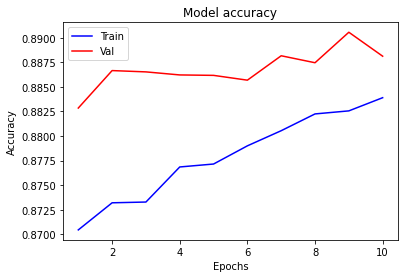

In [31]:
plotgraphacc(epochs, accuracy, val_accuracy)

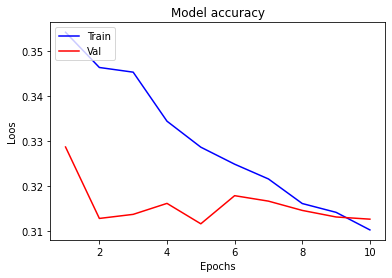

In [32]:
plotgraphloss(epochs, loss, val_loss)